# Spam Classifier | NLP

### Spam classifier based on Bag of words 

1) The data is taken from the UCI spam collection dataset : https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

2) We will use Stemming 

3) The proportion of ham and spam should be in equal proportion

In [1]:
import pandas as pd

In [2]:
messages = pd.read_csv('SMSSPAMCOLLECTION', sep = '\t', names = ["label", "message"]) #tab separator

In [3]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
import re
import nltk
nltk.data.path.append("G:/Miniconda_projs/nltk_data/")

## Data Cleaning and preprocessing

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000) #limit the words to top 5000 frequent words
X = cv.fit_transform(corpus).toarray()


In [7]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
X.shape #columns represent no. of words

(5572, 5000)

In [9]:
y = pd.get_dummies(messages["label"]) #converting text to dummies

In [10]:
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


In [11]:
y = y.drop("ham", axis = 1) #representing spam and ham using one column only

In [12]:
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state =0)

In [14]:
X_test.shape , X_train.shape

((1115, 5000), (4457, 5000))

In [35]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_mod = MultinomialNB().fit(X_train,y_train)


G:\Miniconda_projs\sampleproject_1\env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
y_pred = spam_mod.predict(X_test)

In [17]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [18]:
y_test

,spam
4456,0
690,1
944,0
3768,0
1189,0
...,...
2906,0
1270,0
3944,0
2124,1


In [19]:
from sklearn.metrics import confusion_matrix
conf_m = confusion_matrix(y_test,y_pred)

In [20]:
conf_m

array([[946,   9],
       [  8, 152]], dtype=int64)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

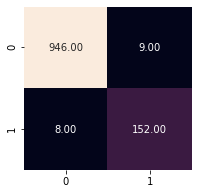

In [22]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(conf_m,annot = True, cbar = False, fmt = ".2f")

In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [24]:
accuracy

0.9847533632286996

In [25]:
import pickle

In [30]:
pickle.dump(spam_mod, open("model.pkl","wb"))

In [31]:
model = pickle.load(open("model.pkl", "rb"))

In [36]:
pickle.dump(cv, open("transform.pkl", "wb"))